<a href="https://colab.research.google.com/github/aecins/tutorials/blob/main/least_squares/whitening_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

NUM_PARAMETERS = 2

# Function that generates random values drawn from uniform distribution with a given range.
def generate_random_uniform(y_size, x_size, value_min, value_max):
    assert(value_max > value_min)

    values = np.random.rand(y_size, x_size)
    values = values * (value_max - value_min)
    values = values + value_min

    return values

In [ ]:
# Create a random covariance matrix. This can be done by creating a random square matrix M
# and then constructing covariance matrix as cov = M^t * M
M = generate_random_uniform(NUM_PARAMETERS, NUM_PARAMETERS, -1, 1)
cov = M.transpose().dot(M)
print(cov)

[[ 1.8973024  -0.9765695 ]
 [-0.9765695   0.73336599]]


In [ ]:
# Generate samples from a Gaussain distribution with zero mean and given covariance matrix
NUM_SAMPLES = 100000
mean = np.zeros(NUM_PARAMETERS)
samples = np.random.multivariate_normal(mean, cov, NUM_SAMPLES).transpose()

# Check that sample covariance is close to true covariance.
print("Measured sample covariance:")
print(np.cov(samples))

Measured sample covariance:
[[ 1.91947319 -0.9881624 ]
 [-0.9881624   0.74009747]]


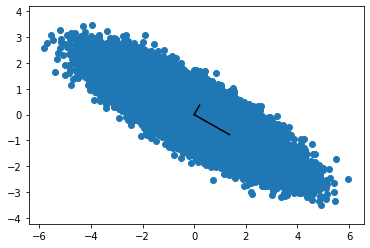

In [ ]:
# Plot a scatter plot of samples.
def plot_samples(samples):
    # Scatterplot of samples.
    max_val = np.absolute(samples).max()
    plt.scatter(samples[0,:], samples[1,:])

    # Eigenvectors of the covariance matrix.
    cov = np.cov(samples)
    [eival, eivec] = np.linalg.eig(cov)
    eivec_scaled = eivec * np.sqrt(eival)  # scale eigenvectors by the square root of eigen values
    plt.plot([0, eivec_scaled[0, 0]], [0, eivec_scaled[1, 0]], 'k')
    plt.plot([0, eivec_scaled[0, 1]], [0, eivec_scaled[1, 1]], 'k')

    plt.axis('equal')

plot_samples(samples)

## Whitening transforms ([wiki](https://en.wikipedia.org/wiki/Whitening_transformation))
Given a random variable $X$ with a covariance matrix $\Sigma$ a whitening transform $W$ is a linear transform that transforms $X$ to have an indetity covariance matrix:
$$cov(X) = \Sigma \\
cov(WX) = I$$

In other words, a whitening transform decorrelates the elements of $X$ and scales them to have unit variance.

Given a multivariate random distribution with a covariance matrix $\Sigma$ we can think of the covariance as an elipse that represents the spread of points sampled from the random distribution. A whitening transform rotates the ellipse and scales its axes to transform it into a unit circle.

### Properties
Transforming a random variable $X$ with a linear transform $M$ has the following effect on the covariance:
$$cov(MX) = Mcov(X)M^T$$
This property can be proven by expanding the definition of covariance matrix $cov(WX) = E[(W(X - \mu))(W(X - \mu))^T]$.

Hence for a whitening transform $W$ we have:
$$cov(WX) = I \\
W\Sigma W^T = I \\
W^T = \Sigma^{-1}W^{-1} \\
W^TW = \Sigma^{-1}$$

Whitening transforms are not unique. For a given covariance matrix there are multiple matrices $W$ that satisfy the properties of a whitening transform.

### Square root of covariance
One of the whitening transforms is the square root of covariance:
$$W = \Sigma^{-\frac{1}{2}}$$

[[1.67538796 2.23099082]
 [2.23099082 4.33442189]]
[[1.67538796 2.23099082]
 [2.23099082 4.33442189]]
Covariance of whitened samples:
[[ 1.01038715 -0.0031279 ]
 [-0.0031279   1.00420728]]
[1.01169397 1.00290046]
[[ 0.92270693  0.38550217]
 [-0.38550217  0.92270693]]
[[ 0.93349704  0.38662031]
 [-0.39001023  0.9253832 ]]


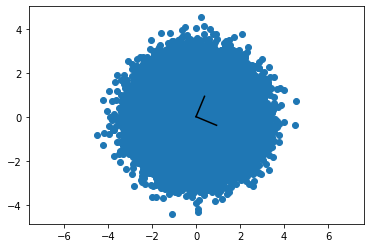

In [ ]:
cov_inv = np.linalg.inv(cov)
W = sqrtm(cov_inv)
samples_whitened = W.dot(samples)

print(cov_inv)
print(W.transpose().dot(W))

print("Covariance of whitened samples:")
print(np.cov(samples_whitened))

# Plot scatter plot of whitened data
plot_samples(samples_whitened)